In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
#解决作图时中文无法显示的问题
plt.rc('font', family='SimHei', size=14)
#字体的大小为14，黑体

In [17]:
#######################时域采样理论验证程序

#观察时间Tp=64微妙
Tp=64/1000
#产生M长采样序列x(n)
#Fs=1000; T=1/Fs;
Fs=1000;
T=1/Fs;
M=Tp*Fs;
n=np.arange(0,M-1)
A=444.128; 
alph=np.pi*50*2**0.5;
omega=np.pi*50*2**0.5;
xnt=A*np.exp(-alph*n*T)*np.sin(omega*n*T)
#M点FFT[(xnt)]
Xk=T*np.fft.fft(xnt)

In [18]:
#T*FT[xa(nT)],Fs=1000Hz
k=np.arange(M-1)
fk=k/Tp;

Text(0,0.5,'幅度')

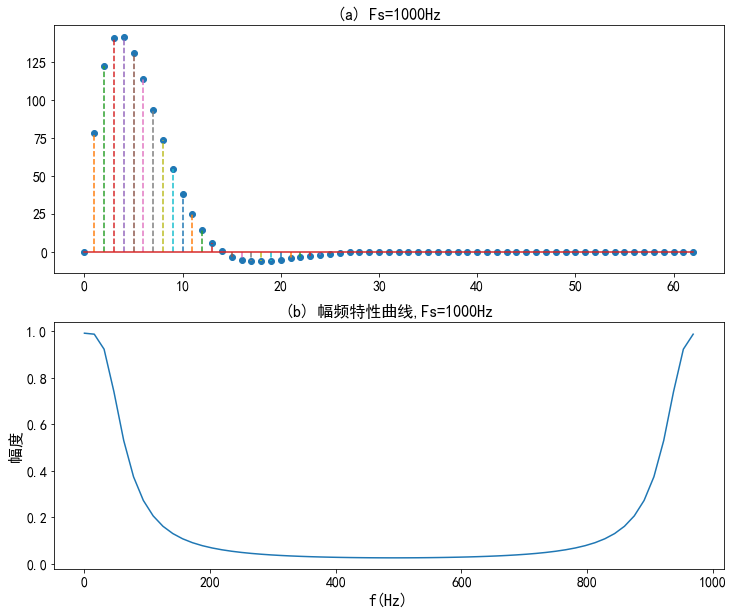

In [19]:
fig,axxr=plt.subplots(2,1,figsize=(12,10))
axxr[0].stem(xnt,'--')
axxr[0].set_title("(a) Fs=1000Hz",fontsize=16)
axxr[1].plot(fk,abs(Xk))
axxr[1].set_title('(b) 幅频特性曲线,Fs=1000Hz',fontsize=16)
axxr[1].set_xlabel('f(Hz)',fontsize=16)
axxr[1].set_ylabel('幅度',fontsize=16)

In [20]:
#help(np.fft.fft)

In [21]:
#=================================
# Fs=300Hz和 Fs=200Hz的程序与上面Fs=1000Hz的程序完全相同。

# fs=300Hz
#观察时间Tp=64微秒
Tp=64/1000;
#产生M长采样序列x(n)
#Fs=1000; T=1/Fs;
Fs=300;
T=1/Fs;
M=Tp*Fs;
n=np.arange(M-1)
A=444.128; 
alph=np.pi*50*2**0.5;
omega=np.pi*50*2**0.5; 
xnt=A*np.exp(-alph*n*T)*np.sin(omega*n*T);
#M点FFT[(xnt)]
Xk=T*np.fft.fft(xnt);

In [22]:
k=np.arange(M-1)
fk=k/Tp;

Text(0,0.5,'幅度')

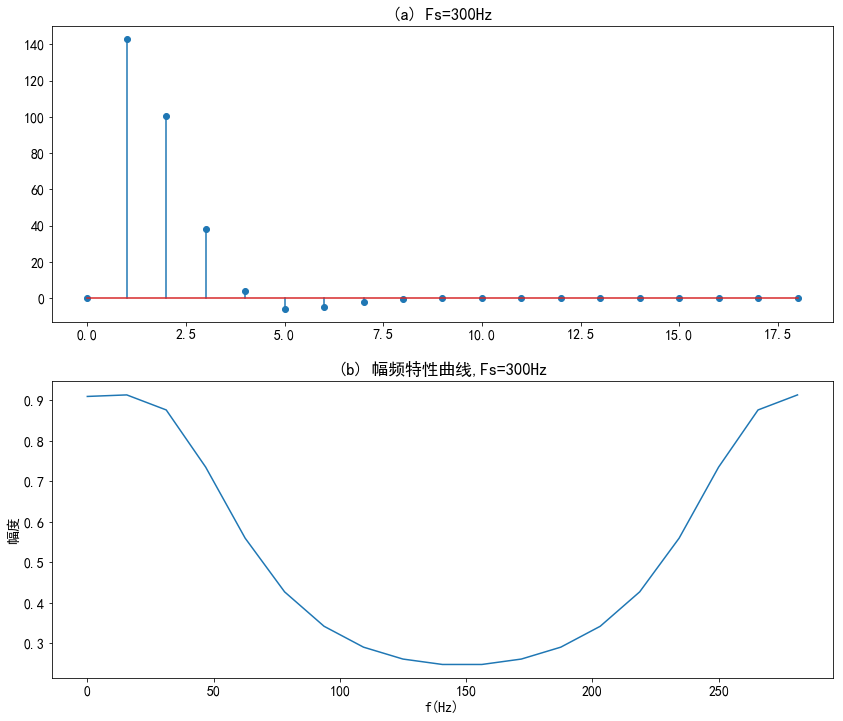

In [23]:
fig,axxr=plt.subplots(2,1,figsize=(14,12))
#调用自编绘图函数tstem绘制序列图
axxr[0].stem(xnt)
axxr[0].set_title("(a) Fs=300Hz")
axxr[1].plot(fk,abs(Xk))
axxr[1].set_title("(b) 幅频特性曲线,Fs=300Hz")
axxr[1].set_xlabel("f(Hz)")
axxr[1].set_ylabel("幅度")

In [29]:
#############################
# fs=200Hz

#观察时间Tp=64微秒
Tp=64/1000;
#产生M长采样序列x(n)
# Fs=1000; T=1/Fs;
Fs=200;
T=1/Fs;
M=Tp*Fs;
n=np.arange(M-1)
A=444.128; 
alph=np.pi*50*2**0.5; omega=np.pi*50*2**0.5; 
xnt=A*np.exp(-alph*n*T)*np.sin(omega*n*T);
#M点FFT[(xnt)]
Xk=T*np.fft.fft(xnt);

In [30]:
k=np.arange(M-1)
fk=k/Tp

Text(0,0.5,'幅度')

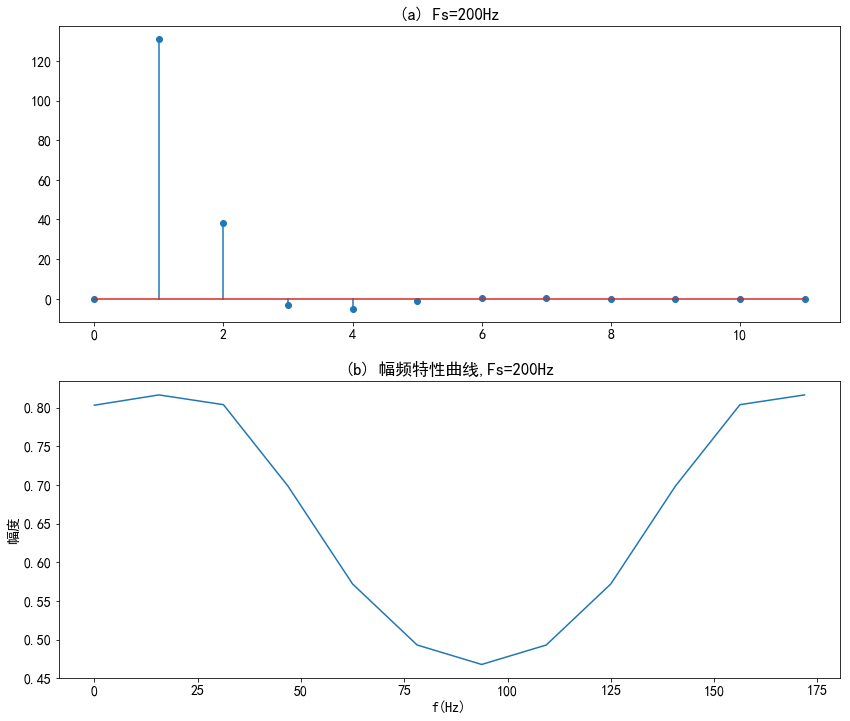

In [31]:
#调用绘图函数tstem绘制序列图
fig,axxr=plt.subplots(2,1,figsize=(14,12))
axxr[0].stem(xnt)
axxr[0].set_title("(a) Fs=200Hz")
axxr[1].plot(fk,abs(Xk))
axxr[1].set_title("(b) 幅频特性曲线,Fs=200Hz")
axxr[1].set_xlabel("f(Hz)")
axxr[1].set_ylabel("幅度")

In [27]:
#####################
#频域采样理论验证程序
M=27;
N=32;
n=np.arange(M)
#产生M长三角波序列x(n)
xa=np.arange(math.floor(M/2)+1)
xb=np.arange(math.ceil(M/2)-1,-1,-1)  #bugBUgBUG
xn=np.hstack((xa,xb))
#1024点FFT[x(n)], 用于近似序列x(n)的TF
Xk=np.fft.fft(xn,1024);
#32点FFT[x(n)]
X32k=np.fft.fft(xn,32);
#32点IFFT[X32(k)]得到x32(n)
x32n=np.fft.ifft(X32k);
#隔点抽取X32k得到X16(K)
X16k=X32k[0:N:2];
#16点IFFT[X16(k)]得到x16(n)
x16n=np.fft.ifft(X16k,N/2);

D:\program\anaconda\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


D:\program\anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'|X_3_2(n)|')

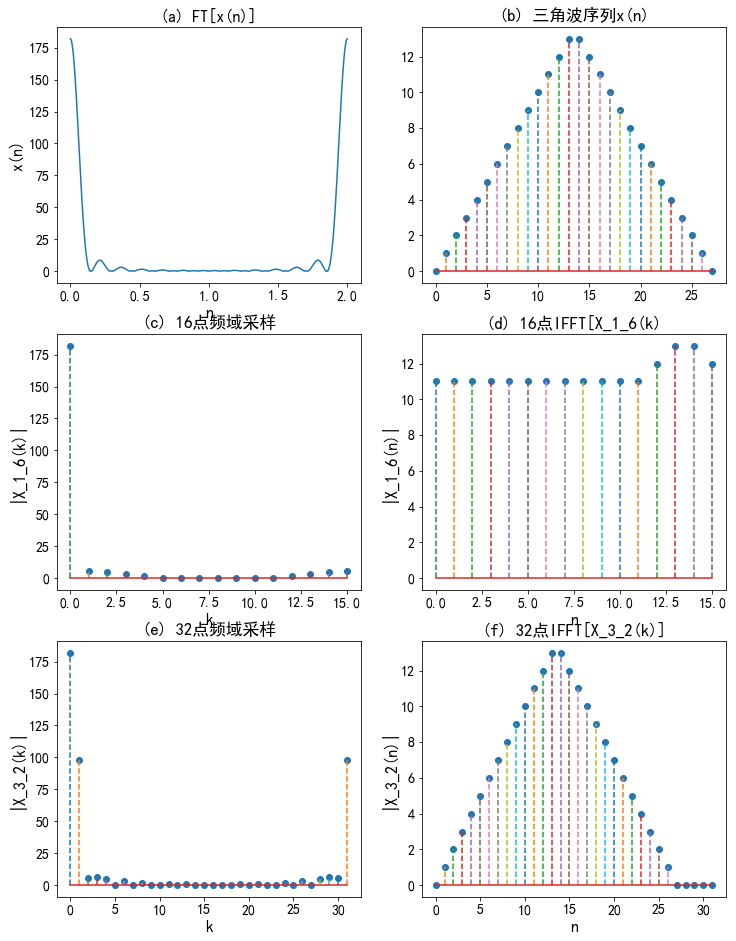

In [28]:
fig,axxr=plt.subplots(3,2,figsize=(12,16))
k=np.arange(1024);
wk=2*k/1024
axxr[0][0].plot(wk,abs(Xk))
axxr[0][0].set_title("(a) FT[x(n)]",fontsize=16)
axxr[0][0].set_xlabel('\omega/\pi',fontsize=16)
axxr[0][0].set_ylabel('|X(e^j^\omega)|',fontsize=16)
axxr[0][1].stem(xn,'--')
axxr[0][1].set_title("(b) 三角波序列x(n)")
axxr[0][0].set_xlabel('n',fontsize=16)
axxr[0][0].set_ylabel('x(n)',fontsize=16)
k=np.arange(N/2)
axxr[1][0].stem(k,abs(X16k),'--')
axxr[1][0].set_title("(c) 16点频域采样")
axxr[1][0].set_xlabel('k',fontsize=16)
axxr[1][0].set_ylabel('|X_1_6(k)|',fontsize=16)
n1=np.arange(N/2)
axxr[1][1].stem(k,x16n,'--')
axxr[1][1].set_title("(d) 16点IFFT[X_1_6(k)")
axxr[1][1].set_xlabel('n',fontsize=16)
axxr[1][1].set_ylabel('|X_1_6(n)|',fontsize=16)
k=np.arange(N)
axxr[2][0].stem(k,abs(X32k),'--')
axxr[2][0].set_title("(e) 32点频域采样")
axxr[2][0].set_xlabel('k',fontsize=16)
axxr[2][0].set_ylabel('|X_3_2(k)|',fontsize=16)
n1=np.arange(N)
axxr[2][1].stem(k,x32n,'--')
axxr[2][1].set_title("(f) 32点IFFT[X_3_2(k)]")
axxr[2][1].set_xlabel('n',fontsize=16)
axxr[2][1].set_ylabel('|X_3_2(n)|',fontsize=16)

注意两处：
1.np.arange(N)    不包括N
2.np.fft.fft(x,n,axis)的用法